# Import required packages

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
import pickle

# Import assets

In [90]:
mat_content = sio.loadmat('assets/face.mat')
mat_content['X'][:, 0].shape

(2576,)

# Split into training and testing sets

In [240]:
image_data = mat_content['X'].T
print(image_data.shape)

data_label = mat_content['l'][0].T
print(label.shape)
X_train, X_test, y_train, y_test = train_test_split(image_data, data_label, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

train_image = X_train.T
train_label = y_train.T

test_image = X_test.T
test_label = y_test.T

(520, 2576)
(520,)
(416, 2576)
(104, 2576)


# Functions

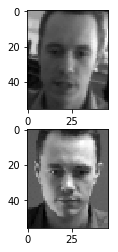

In [248]:
def plot_n_face(mat_content, num):
    face_data = mat_content['X']
    face_label_data = mat_content['l']
    face_label = face_label_data[0, num]
    face = face_data[:, num]
    variant = num % 8 + 1
    plt.imshow(np.reshape(face,(46,56)).T, cmap = 'gist_gray')
    plt.title(f'Face {face_label} (Variant {variant})'), plt.xticks([]), plt.yticks([])
    
def plot_face(face):
    plt.imshow(np.reshape(face,(46,56)).T, cmap = 'gist_gray')

plt.subplot(211), plot_face(train_image[:, 0])
plt.subplot(212), plot_face(train_image[:, 6])

plt.show()

# Cache data with Pickle

In [ ]:
PIK = 'pickle_cov.dat'

def write_to_pickle(data):
    with open(PIK, 'wb') as f:
        pickle.dump(data, f)

def read_from_pickle():
    with open(PIK, 'rb') as f:
        pickle.load(f)
    

# Use eigen values and eigen vectors 

(416, 2576)
(2576,)
[[2481.60479611 2348.904576   2153.01711075 ... -477.0233202
  -545.55662651 -521.83303985]
 [2348.904576   2586.50587929 2471.15014481 ... -498.38281395
  -552.53373494 -535.69511121]
 [2153.01711075 2471.15014481 2607.79142146 ... -523.49369208
  -568.34819277 -542.16753939]
 ...
 [-477.0233202  -498.38281395 -523.49369208 ... 2709.3920702
  2554.24457831 2439.12249768]
 [-545.55662651 -552.53373494 -568.34819277 ... 2554.24457831
  2774.14457831 2669.62891566]
 [-521.83303985 -535.69511121 -542.16753939 ... 2439.12249768
  2669.62891566 2762.89481001]]
(2576, 2576)
[ 9.03120163e+05+0.00000000e+00j  5.04079583e+05+0.00000000e+00j
  4.45520360e+05+0.00000000e+00j ...  2.16781551e-13+7.84621423e-14j
  2.16781551e-13-7.84621423e-14j -1.35847914e-13+0.00000000e+00j]
[[-1.47745114e-02+0.j          1.94967756e-02+0.j
  -1.00498331e-02+0.j         ... -6.98802968e-05-0.00027563j
  -6.98802968e-05+0.00027563j -1.29887673e-04+0.j        ]
 [-1.70561805e-02+0.j          1.9

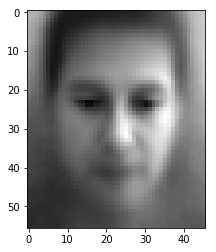

In [249]:
def compute_avg_face(face_list, axis=1):
    face_avg = np.mean(face_list, axis=axis)
    return face_avg

def compute_phi(image_data):
    face_avg = compute_avg_face(train_image[:,])
    phi_face = train_image.T - face_avg
    
print(phi_face.shape)

plot_face(face_avg)
print(face_avg.shape)

def compute_cov_face(face_list):
    return np.cov(face_list)

s = compute_cov_face(phi_face.T) # Utilise broadcasting to deduct row by row
print(s)
print(s.shape)
eigvals, eigvecs = np.linalg.eig(s) 
print(eigvals)

print(eigvecs)


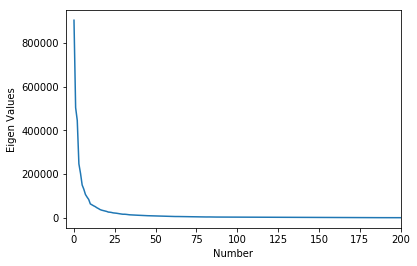

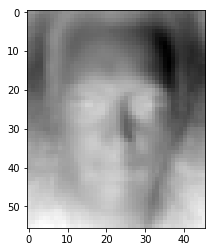

In [250]:
plt.plot(eigvals.real)

plt.xlabel('Number')
plt.ylabel('Eigen Values')
plt.xlim([-5, 200])
plt.show()

plot_face(((eigvecs[:, 0].real)))

(2576,)
(100,)


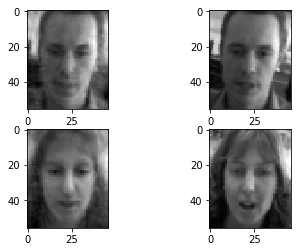

In [267]:
m_eigvecs = eigvecs[:, :100]
a = phi_face.dot(m_eigvecs)

x_n = face_avg + a.dot(m_eigvecs.T)
plt.subplot(221), plot_face(x_n[0, :].T.real)

plt.subplot(222), plot_face(train_image[:, 0])

a_test = m_eigvecs.T.dot(test_image[:, 3])
x_test = face_avg + a_test.dot(m_eigvecs.T)
print(x_test.shape)

plt.subplot(223), plot_face(x_test.T.real)
plt.subplot(224), plot_face(test_image[:, 3])

print(a_test.shape)
plt.show()

# Cleaning up code for testing

In [ ]:
def NNClassifier (w_training, training_label, m_eigvecs, mean_image, test_image):
    # map test image onto eigenspace
    phi = test_image - mean_image
    #plot_face(test_image)
    a_test = m_eigvecs.T.dot(phi)
    print(a_test.shape)
    print(w_training.shape)
    print((w_training-a_test).shape)
    dist = np.linalg.norm(w_training-a_test,axis=1) 
    print(dist.shape)
    return training_label[np.argmin(dist)]

result = NNClassifier (a, train_label, m_eigvecs, face_avg, test_image[:, 39])
print(result)
print(test_label[39])
print(test_label)
print(train_label)
plt.subplot(211), plot_face(test_image[:,39])
plt.subplot(212), plot_face(train_image[:,0])